# TRANSFER LEARNING INCEPTION v3

- Try custom classifier

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, utils, callbacks
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
print("Tensorflow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

Tensorflow version:  2.1.0
Keras version:  2.2.4-tf


In [4]:
image_shape = (299, 299, 3)
batch_size = 32
epoch = 50
seed_generator = 123
lr_init = 1e-4

#  Prepare dataset

In [5]:
conv_base = InceptionV3(include_top=False,
                        weights="imagenet",
                        input_shape=image_shape)

conv_base.trainable = False
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
utils.plot_model(conv_base, show_shapes=True, dpi=300)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.604792 to fit



# Training Model

## Keras

In [7]:
try:
    del (model)
except:
    pass

In [8]:
input_layer = keras.Input(shape=(image_shape))
x = preprocess_input(input_layer)
x = conv_base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x)
output_layer = layers.Activation("softmax")(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=lr_init),
              metrics=["categorical_accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_truediv (TensorF [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_sub (TensorFlowO [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
_________________________________________________________________
activation_94 (Activation)   (None, 5)                 0     

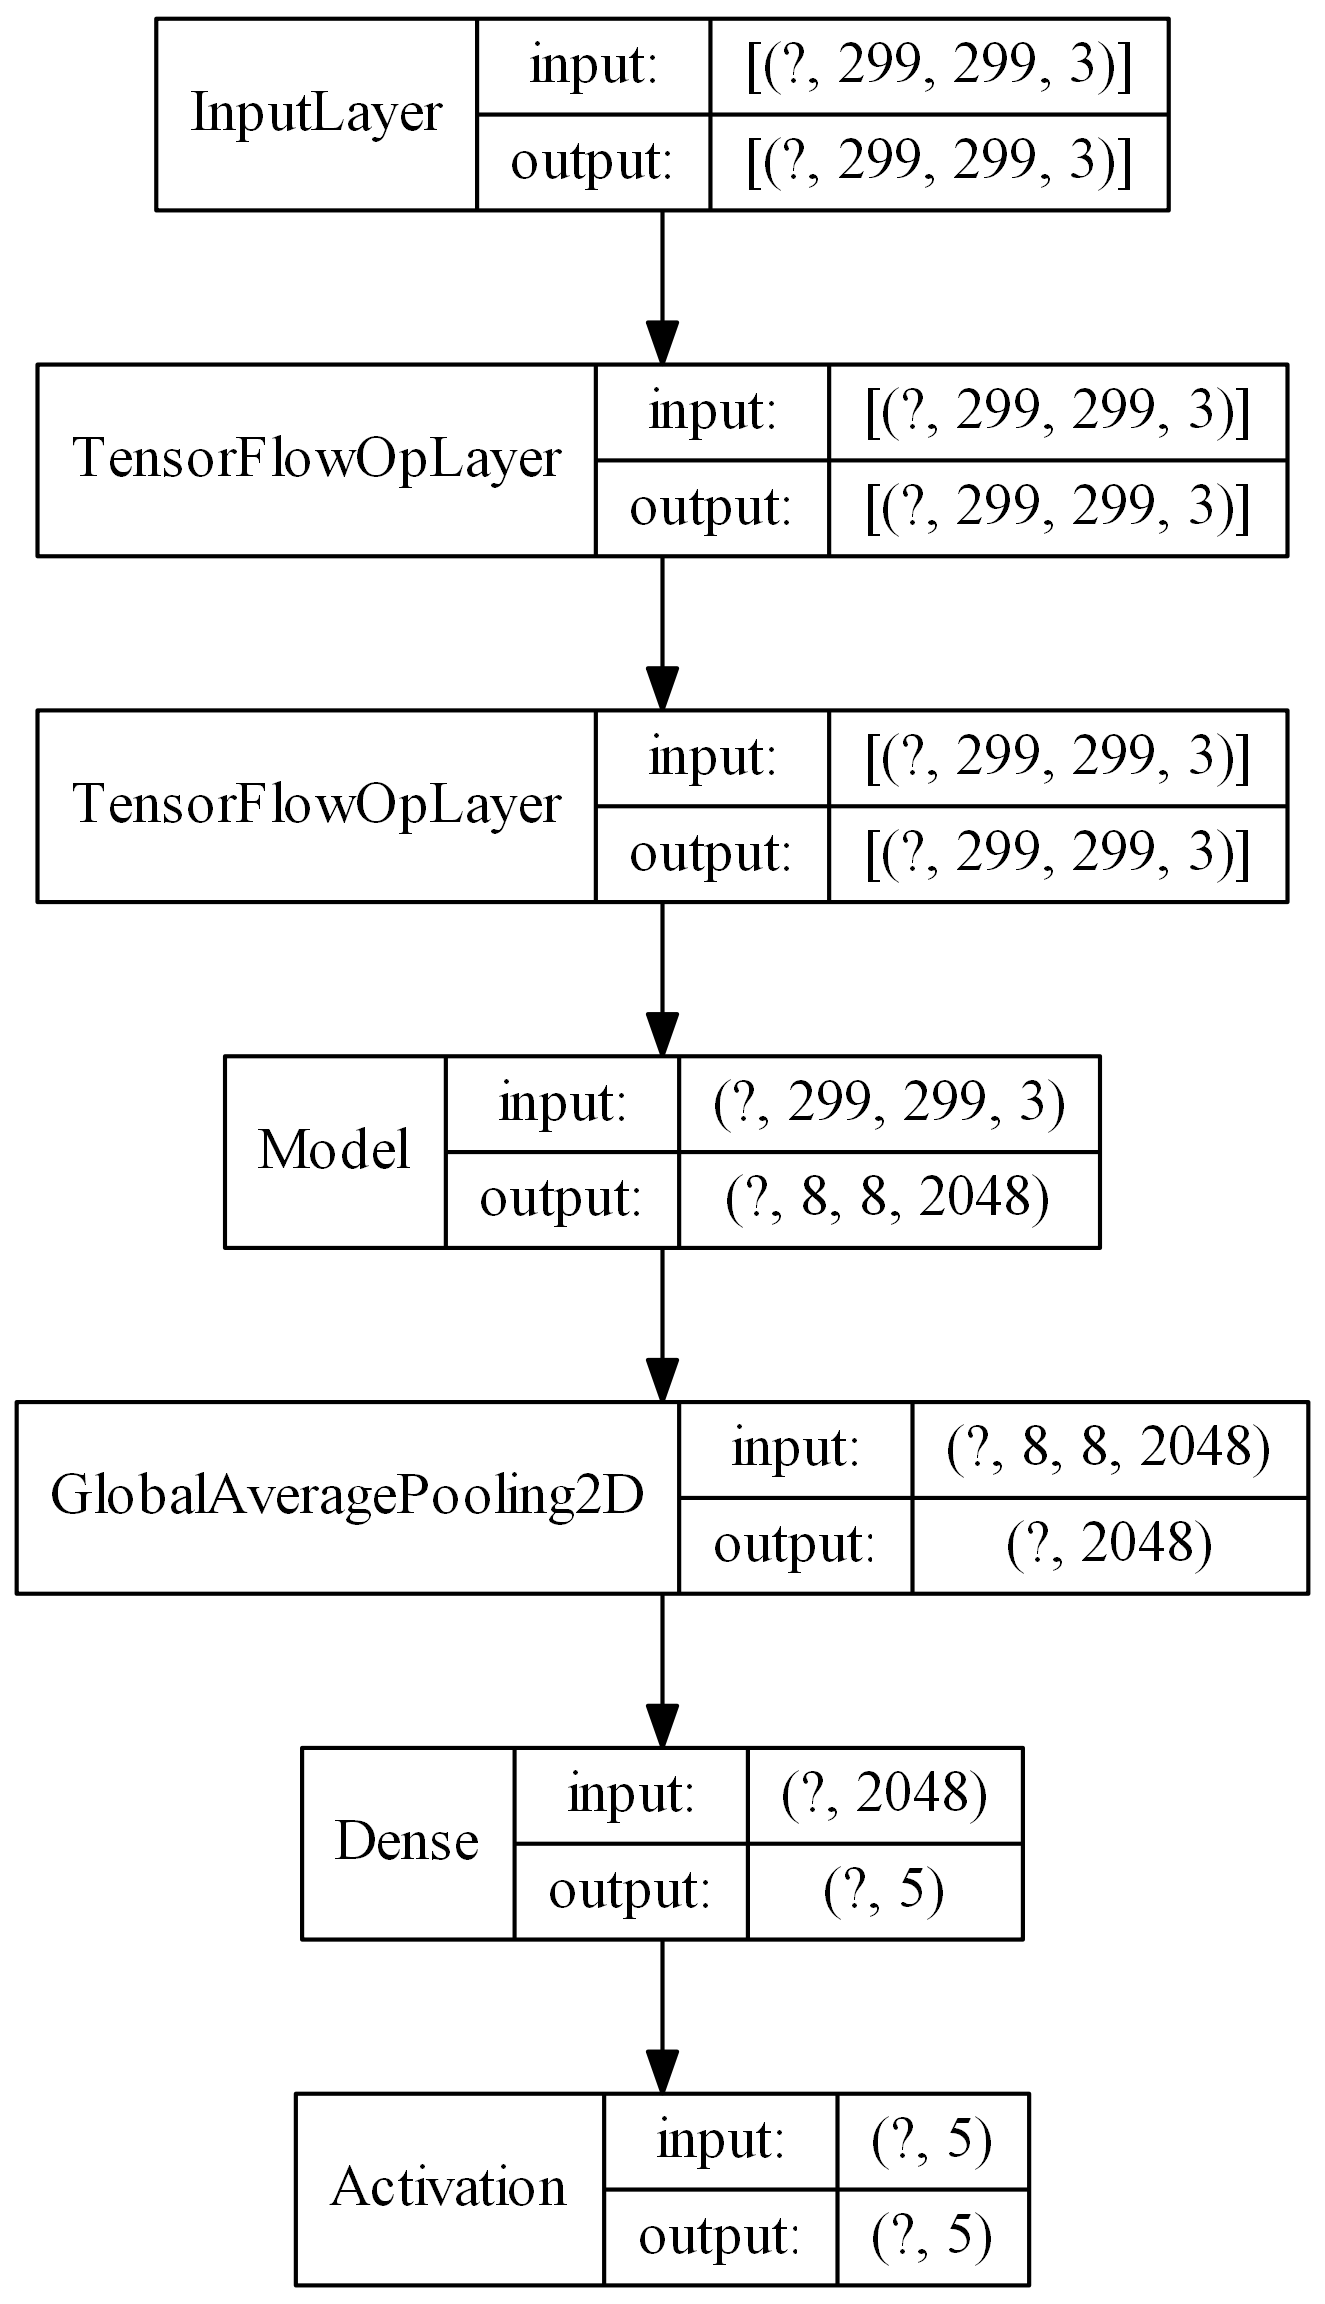

In [10]:
utils.plot_model(model, show_shapes=True, show_layer_names=False, dpi=300)

## Fastai 

In [11]:
try:
    del (model)
except:
    pass

In [12]:
input_layer = keras.Input(shape=(image_shape))
x = preprocess_input(input_layer)
x = conv_base(x, training=False)
x1 = layers.GlobalAveragePooling2D()(x)
x2 = layers.GlobalMaxPooling2D()(x)
x = layers.Concatenate()([x1, x2])
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = layers.Activation("relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(5)(x)
output_layer = layers.Activation("softmax")(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=lr_init),
              metrics=["categorical_accuracy"])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
tf_op_layer_truediv_1 (TensorFl [(None, 299, 299, 3) 0           input_3[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_sub_1 (TensorFlowOp [(None, 299, 299, 3) 0           tf_op_layer_truediv_1[0][0]      
__________________________________________________________________________________________________
inception_v3 (Model)            (None, 8, 8, 2048)   21802784    tf_op_layer_sub_1[0][0]          
____________________________________________________________________________________________

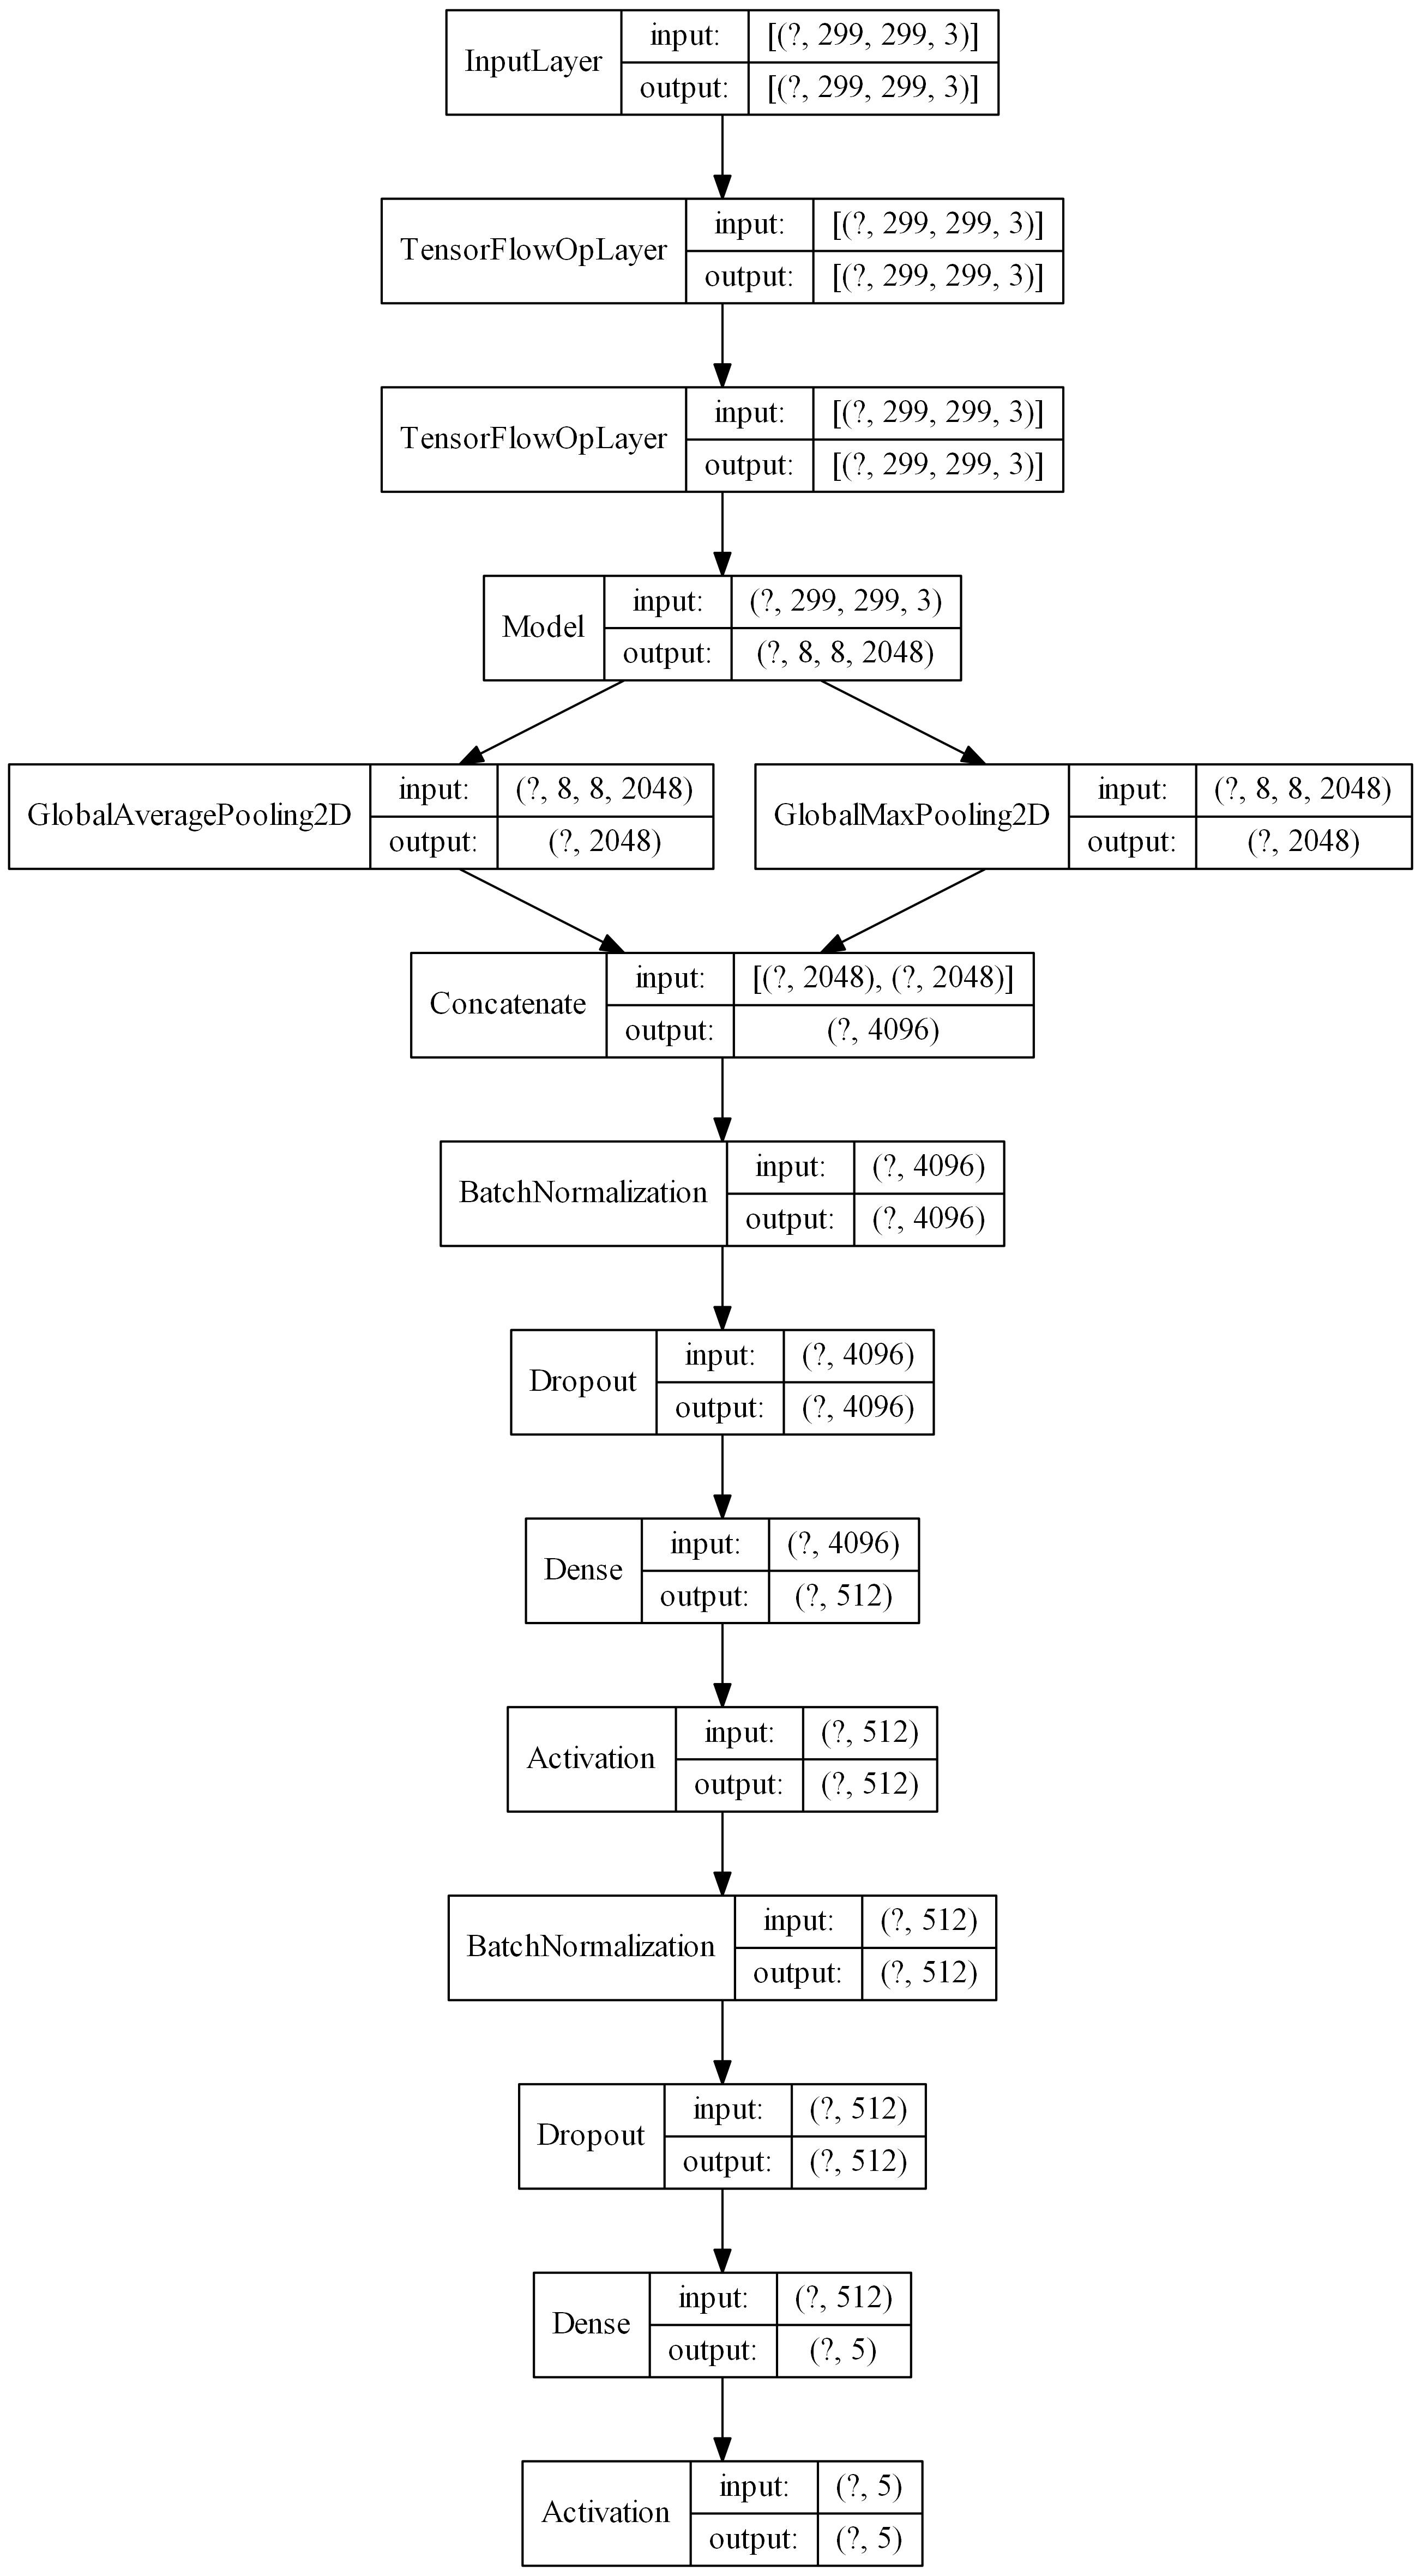

In [14]:
utils.plot_model(model, show_shapes=True, show_layer_names=False, dpi=300)

## Fast.ai Classifier Modified

Source: https://www.coursera.org/learn/deep-neural-network/lecture/RN8bN/fitting-batch-norm-into-a-neural-network


In [15]:
try:
    del (model)
except:
    pass

In [16]:
input_layer = keras.Input(shape=(image_shape))
x = preprocess_input(input_layer)
x = conv_base(x, training=False)
x1 = layers.GlobalAveragePooling2D()(x)
x2 = layers.GlobalMaxPooling2D()(x)
x = layers.Concatenate()([x1, x2])
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(5)(x)
output_layer = layers.Activation("softmax")(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)

In [17]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=lr_init),
              metrics=["categorical_accuracy"])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
tf_op_layer_truediv_2 (TensorFl [(None, 299, 299, 3) 0           input_4[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_sub_2 (TensorFlowOp [(None, 299, 299, 3) 0           tf_op_layer_truediv_2[0][0]      
__________________________________________________________________________________________________
inception_v3 (Model)            (None, 8, 8, 2048)   21802784    tf_op_layer_sub_2[0][0]          
____________________________________________________________________________________________

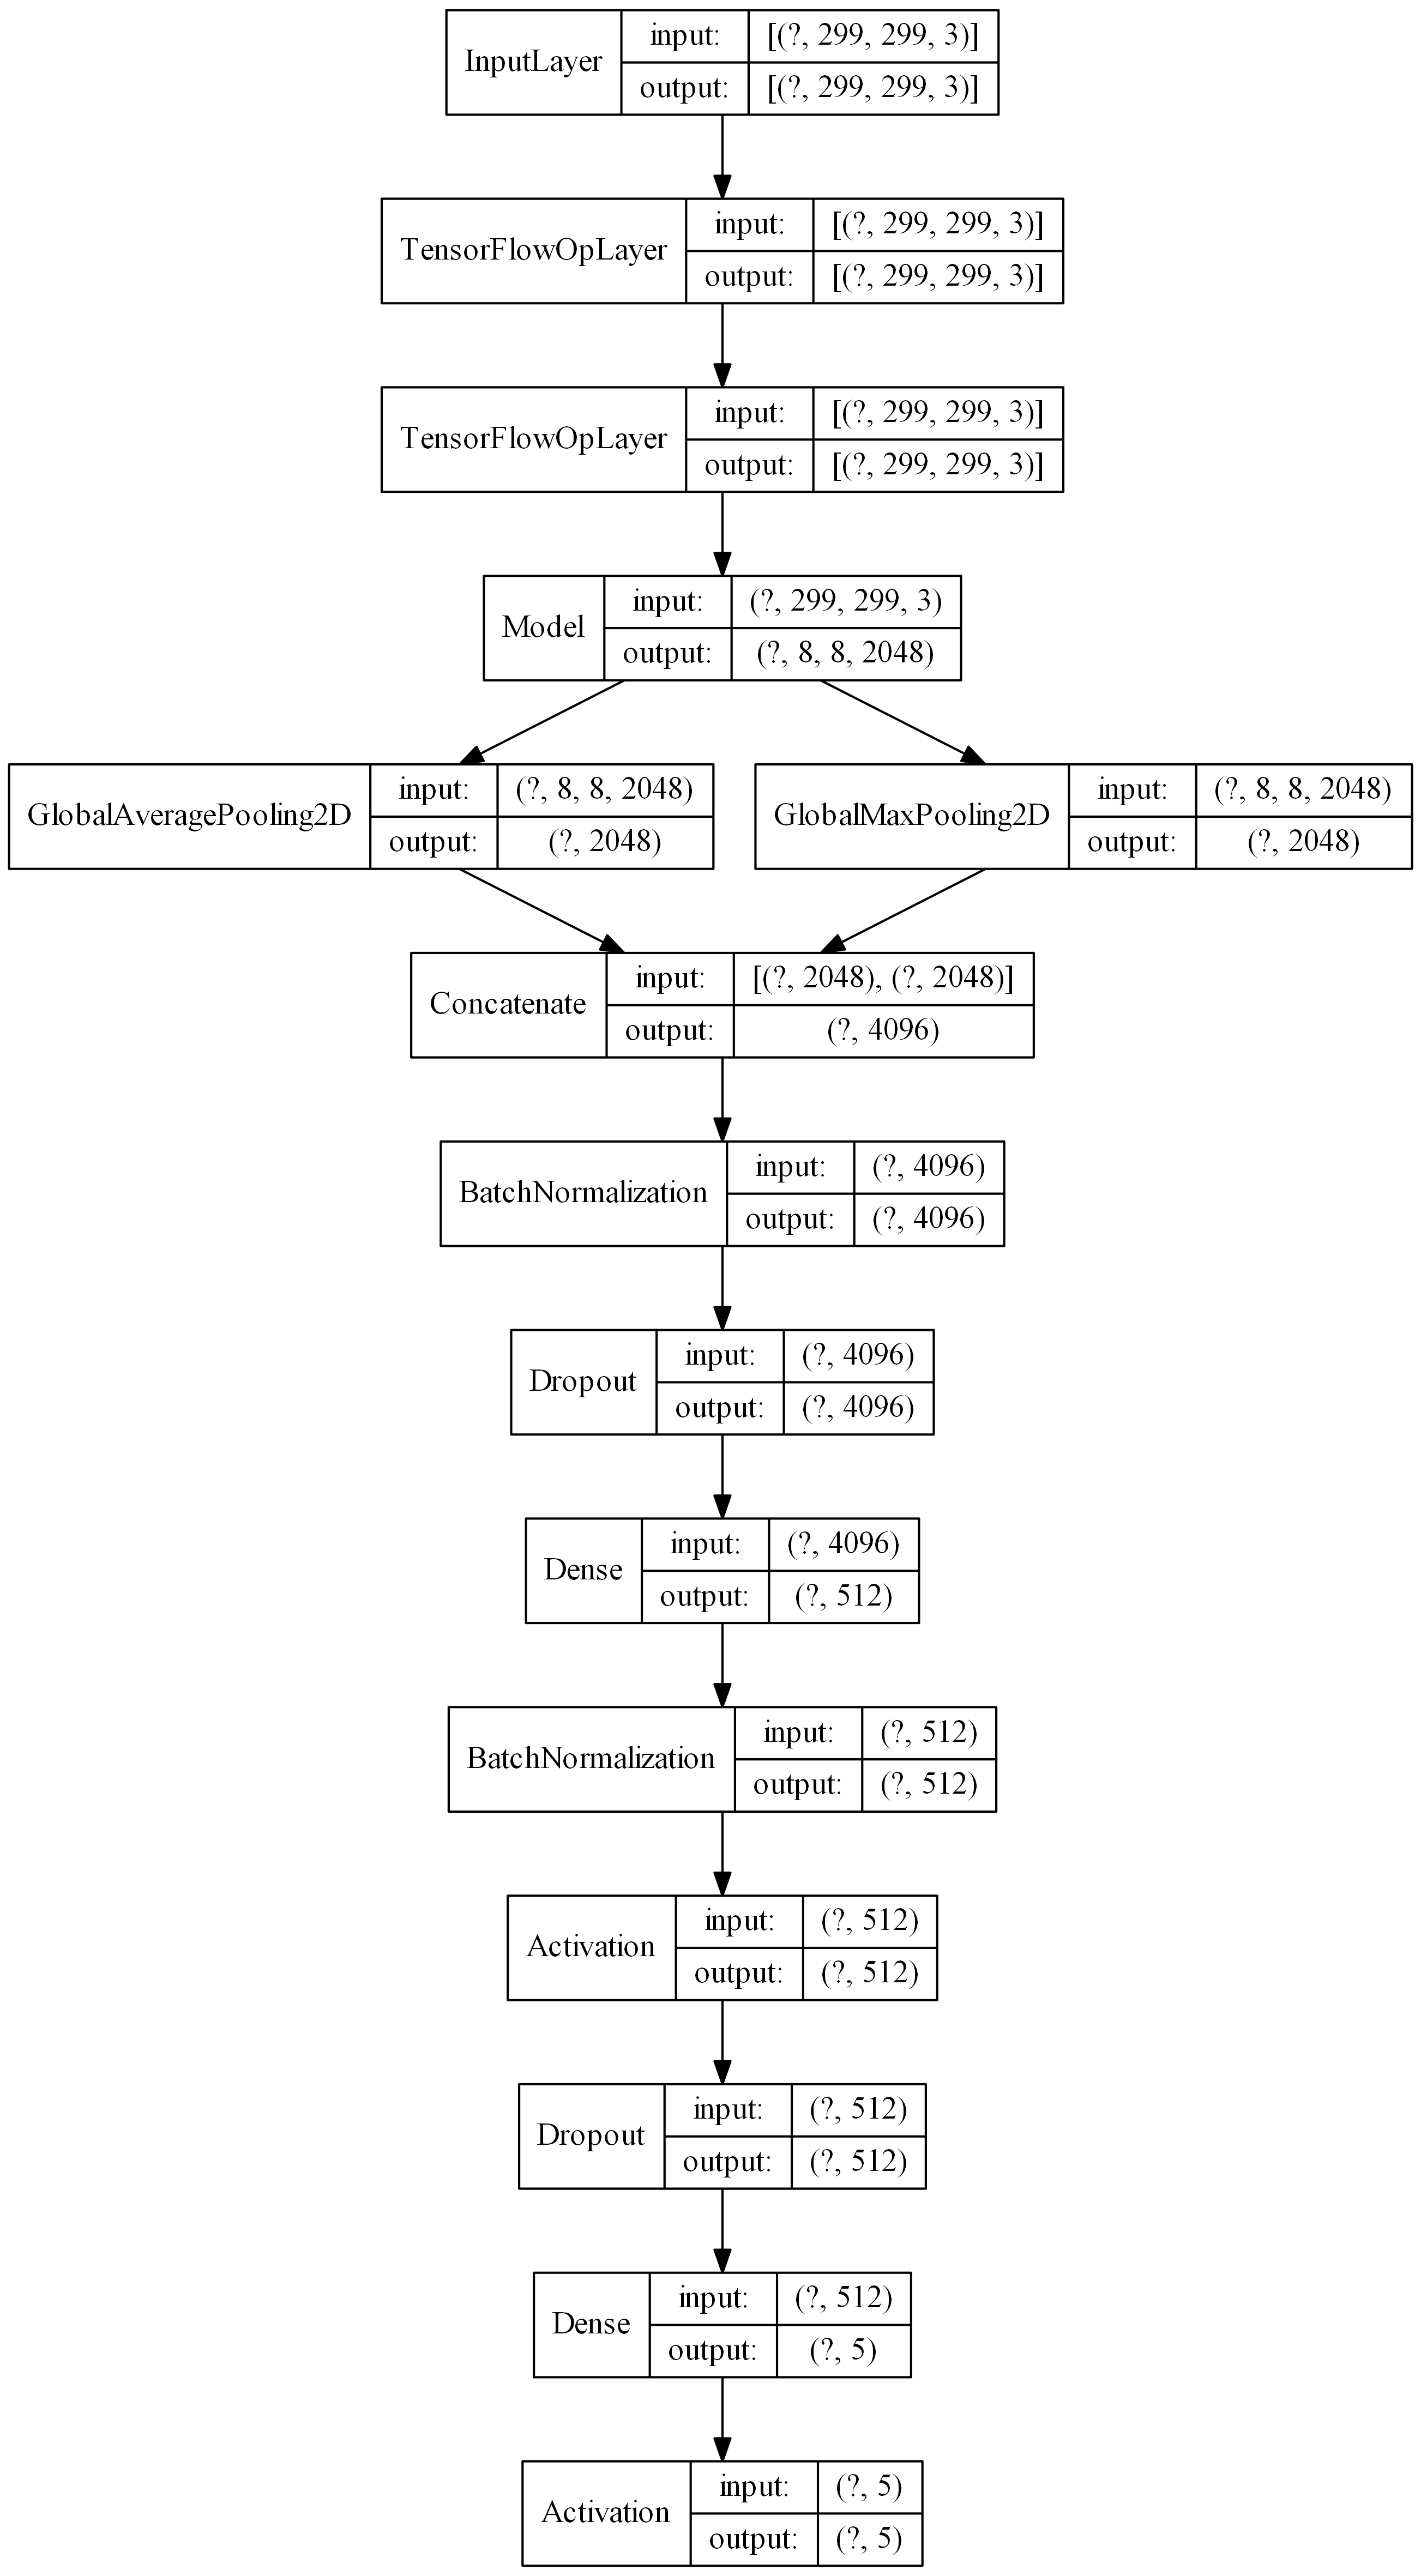

In [18]:
utils.plot_model(model, show_shapes=True, show_layer_names=False, dpi=300)